In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
from matplotlib import cm
import ast

In [15]:
data = pd.read_csv('/Users/hoangthuyduongvu/Desktop/FuzzSIM/results/20250625-080416_iris_capacity_S1/best_capacity.txt')
data

,index,label,capacity_value
0,0,[],0.000000
1,1,[3],0.033961
2,2,[2],0.218455
3,3,[1],0.235364
4,4,[0],0.342614
5,5,"[3, 2]",0.404423
6,6,"[3, 1]",0.413221
7,7,"[3, 0]",0.478705
8,8,"[2, 1]",0.565154
9,9,"[2, 0]",0.758541


In [16]:
numbers = ast.literal_eval(data['label'][15])
print(numbers)  # Output: [3, 2, 1, 0]

[3, 2, 1, 0]


In [17]:
for i in range(len(data)):
    data['label'][i] = ast.literal_eval(data['label'][i])   

/var/folders/p4/7wm8j7tn0n316fy23dlvdbq40000gn/T/ipykernel_95170/1289851990.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['label'][i] = ast.literal_eval(data['label'][i])
/var/folders/p4/7wm8j7tn0n316fy23dlvdbq40000gn/T/ipykernel_

In [18]:
X = np.array(range(4))
Y = np.array(range(4))

X, Y = np.meshgrid(X, Y)

Z = []
for i in range(4):
    tmp = []
    for j in range(4):
        lst = [i,j]  # ensures uniqueness and order
        found = False
        for k in range(len(data)):
            if set(data['label'][k]) == set(lst):
                tmp.append(data['capacity_value'][k])
                found = True
                break
        if not found:
            tmp.append(np.nan)  # or 0.0 or some default value
    Z.append(tmp)

Z = np.array(Z)


In [19]:
Z

array([[0.3426142 , 0.78095286, 0.75854099, 0.47870458],
       [0.78095286, 0.23536356, 0.56515445, 0.41322126],
       [0.75854099, 0.56515445, 0.21845536, 0.40442286],
       [0.47870458, 0.41322126, 0.40442286, 0.0339614 ]])

In [20]:
import pandas as pd

rows = []
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        rows.append({
            'i': i,
            'j': j,
            'label': sorted([i, j]),  # show the combination used
            'capacity_value': Z[i, j]
        })

df_z = pd.DataFrame(rows)

# Preview
print(df_z)

# Save to CSV (optional)
# df_z.to_csv('Z_with_indices.csv', index=False)


    i  j   label  capacity_value
0   0  0  [0, 0]        0.342614
1   0  1  [0, 1]        0.780953
2   0  2  [0, 2]        0.758541
3   0  3  [0, 3]        0.478705
4   1  0  [0, 1]        0.780953
5   1  1  [1, 1]        0.235364
6   1  2  [1, 2]        0.565154
7   1  3  [1, 3]        0.413221
8   2  0  [0, 2]        0.758541
9   2  1  [1, 2]        0.565154
10  2  2  [2, 2]        0.218455
11  2  3  [2, 3]        0.404423
12  3  0  [0, 3]        0.478705
13  3  1  [1, 3]        0.413221
14  3  2  [2, 3]        0.404423
15  3  3  [3, 3]        0.033961


In [21]:
X

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

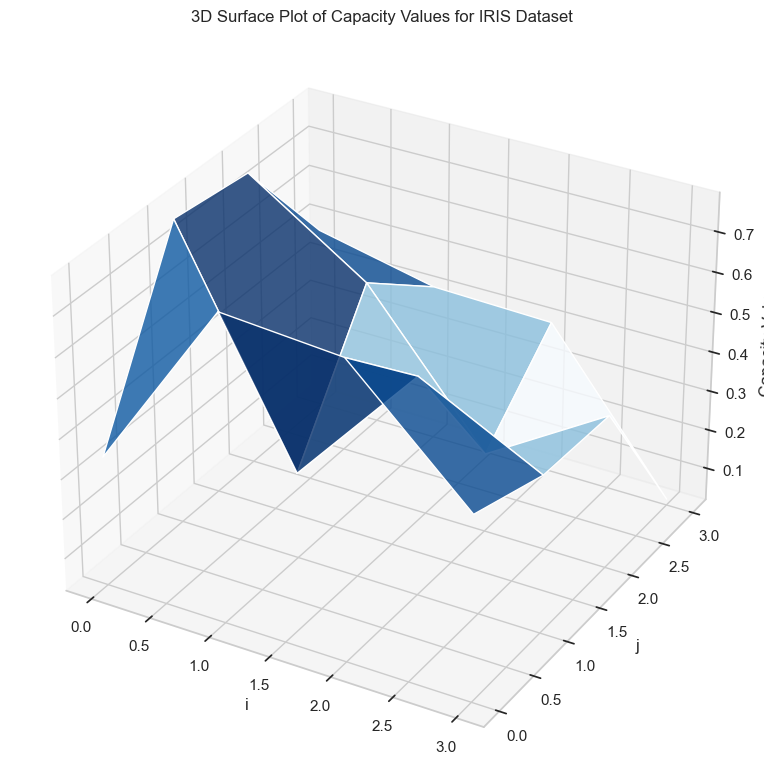

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))
ax.plot_surface(X, Y, Z, cmap=cm.Blues, alpha=0.8)
ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('Capacity Value')
ax.set_title('3D Surface Plot of Capacity Values for IRIS Dataset')
plt.tight_layout()
plt.savefig("/Users/hoangthuyduongvu/Desktop/FuzzSIM/results/20250625-080416_iris_capacity_S1/surface_plot_capacity_iris.png")

In [24]:
d2 = pd.read_csv("/Users/hoangthuyduongvu/Desktop/FuzzSIM/results/20250625-075014_iris_mobius_S2/hill_climbing_convergence_iris_acc.txt")
d3 = pd.read_csv("/Users/hoangthuyduongvu/Desktop/FuzzSIM/results/20250625-075048_iris_mobius_S3/hill_climbing_convergence_iris_acc.txt")
d1 = pd.read_csv("/Users/hoangthuyduongvu/Desktop/FuzzSIM/results/20250625-085801_iris_mobius_S1/hill_climbing_convergence_iris_acc.txt")

In [25]:
acc1 = d1['accuracy'].values
acc2 = d2['accuracy'].values
acc3 = d3['accuracy'].values

print("length of acc1:", len(acc1))
print("length of acc2:", len(acc2))
print("length of acc3:", len(acc3))

length of acc1: 4
length of acc2: 5
length of acc3: 7


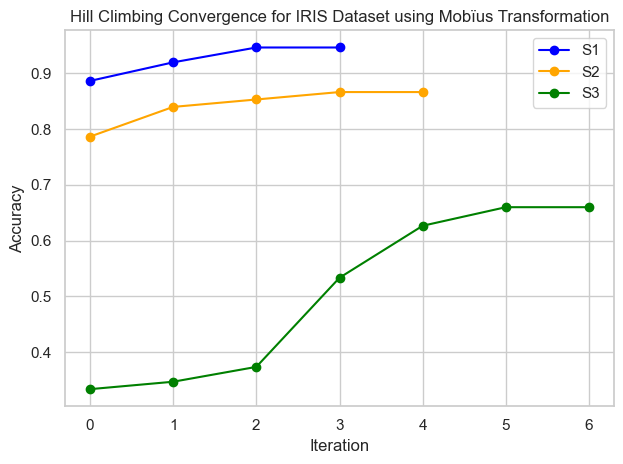

In [27]:
plt.plot(acc1, label='S1', color='blue', marker='o', linestyle='-')
plt.plot(acc2, label='S2', color='orange', marker='o', linestyle='-')
plt.plot(acc3, label='S3', color='green', marker='o', linestyle='-')

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Hill Climbing Convergence for IRIS Dataset using Mobïus Transformation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/Users/hoangthuyduongvu/Desktop/FuzzSIM/results/hill_climbing_convergence_iris_acc_mobius.png")